In [6]:
import nrrd
from glob import glob
from matplotlib import pyplot as plt

In [4]:
data_roi, header_roi = nrrd.read("../data/raw/ROI/Exp10_Exvivo_ADC_map__left_264min - 5000-label.nrrd")
data_img, header_img = nrrd.read("../data/raw/ROI/Exp10_Exvivo_ADC_map__left_264min - 5000.nrrd")

In [14]:
data_img.shape

(128, 128, 15)

In [16]:
data_roi.shape

(128, 128, 15)

## Region of interest
The medula of each kidney is annotated.

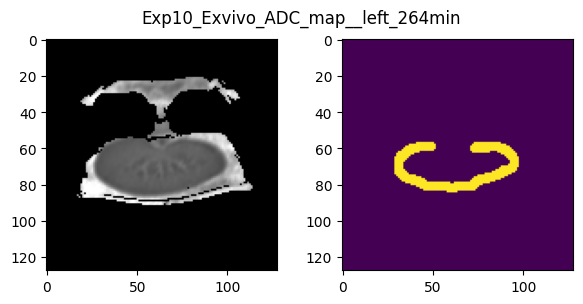

In [50]:
def plot_roi(img, roi, layer=10):
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(7, 3))
    fig.suptitle('Exp10_Exvivo_ADC_map__left_264min')
    axs1.imshow(img[:, :, layer], cmap='grey')
    axs2.imshow(roi[:, :, layer])
    plt.show()

plot_roi(data_img, data_roi, layer=10)